# Likelihood functions

Demonstration of how we can treat the conditional distribution $p(y \mid x)$ as a likelihood function.

==========================================================================

* **Notebook dependencies**:
    * ...

* **Content**: Jupyter notebook accompanying Chapter 2 of the textbook "Fundamentals of Active Inference"

* **Author**: Sanjeev Namjoshi (sanjeev.namjoshi@gmail.com)

* **Version**: 0.1

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from scipy.stats import norm

mpl.style.use("seaborn-deep")

In Bayesian inference we treat the likelihood as a *function* rather than a probability distribution. The conditional distribution $p(y \mid x)$ can be used to generate the probability of the data, $y$, given some hidden state $x$. However, in Bayesian inference we are interested in the inverse relationship: having observed the data, we want to know the probability of the state that could have generated that data. This probability is encoded in the posterior distribution.

To obtain this distribution, we will treat $p(y \mid x)$ in a unique way which we call the **likelihood function**. Specifically, the likelihood function $\mathcal{L}(x)$, is a function of $x$ instead of $y$. What this means is that we start with an observation $y$ and then ask: "If we input the full range of $x$ into this function, what will the resulting curve look like?". Let's generate this curve first and then interpret its meaning.

In [2]:
# Set up modeling objects
y = 7

# We will take the likelihood at 5 different points of x. 
y                     = 7               # Observation from generative process
likelihoods           = np.zeros(5)     # Initialize empty likelihood array
std_y                 = 0.5             # Likelihood standard deviation

# Generating function of likelihood
def gm(x: float, beta_0: float, beta_1: float) -> float:
    return beta_1 * x + beta_0

# What is the likelihood for each of these five points?
for x in range(1, 6):
    # Likelihood at p(y = 7 | x = i)
    likelihood = norm.pdf(y, loc=gm(x, beta_0=3, beta_1=2), scale=std_y)
    likelihoods[x-1] = likelihood
    print(f"The likelihood when y={y} and x={x} is: {likelihood}.")

The likelihood when y=7 and x=1 is: 0.00026766045152977074.
The likelihood when y=7 and x=2 is: 0.7978845608028654.
The likelihood when y=7 and x=3 is: 0.00026766045152977074.
The likelihood when y=7 and x=4 is: 1.0104542167073785e-14.
The likelihood when y=7 and x=5 is: 4.292767471326121e-32.


Notice in the above output that we have held $y$ fixed at whatever the observation was and then we have passed in values of $x = \left \{1, 2, 3, 4, 5 \right \}$. This is why the likelihood is a function of $x$: we have varied $x$ while keeping $y$ constant. Next, lets plot these values. In the plot below the y-axis is labeled with the non-standard term "credibility" instead of probability to indicate that it's not a valid probability density but still conveys the relative differences in likelihood that a specific state would result in the observed sensory data.

<Figure size 640x480 with 0 Axes>

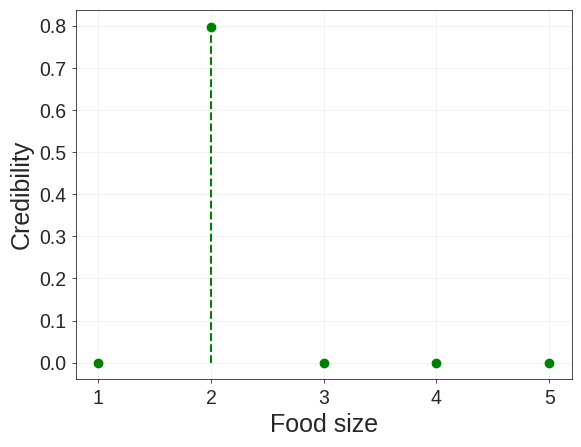

In [3]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, ax = plt.subplots(1, 1, facecolor=(1,1,1))

# Plot linear generating function on canvas
for x in range(1, 6):
    ax.stem(x, likelihoods[x-1], linefmt="g--", markerfmt="go")

ax.set_xlabel("Food size", fontsize=18)
ax.set_ylabel("Credibility", fontsize=18)

# Axis labels and styling
ax.axes.grid(which="major", axis="both", c="#f2f2f2")
plt.setp(ax.spines.values(), color="black", linewidth=0.5)
ax.tick_params(
    labelsize=14,
    axis='both',          
    which='major',      
    bottom=True,
    left=True,
    color="black",
    width=0.5,
    length=3)

Although we have only picked five points there is still a pattern we can see. Let's improve this chart by picking a few more points around $2$ and adding it to the plot. Let's pick $x=1.5$ and $x=2.5$ and see how that changes the plot.

In [4]:
likelihood_x15 = norm.pdf(y, loc=gm(x=1.5, beta_0=3, beta_1=2), scale=std_y)
likelihood_x25 = norm.pdf(y, loc=gm(x=2.5, beta_0=3, beta_1=2), scale=std_y)

# Insert them into the likelihoods array at the correct positions
likelihoods = np.insert(likelihoods, 1, likelihood_x15)
likelihoods = np.insert(likelihoods, 3, likelihood_x25)

In addition, let's go ahead and plot over the entire range of $x$ in our grid (0.01 - 5, with 500 points). To do so we need the entire $x$ range of interest.

In [5]:
x_range = np.linspace(start=0.01, stop=5, num=500)

<Figure size 640x480 with 0 Axes>

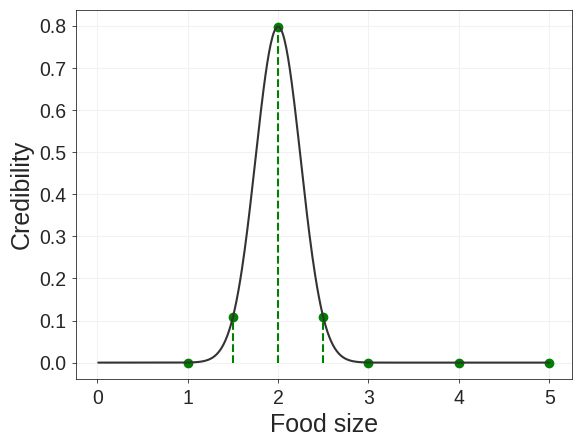

In [6]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, ax = plt.subplots(1, 1, facecolor=(1,1,1))

x_points = [1, 1.5, 2, 2.5, 3, 4, 5]

# Plot linear generating function on canvas
for idx, x in enumerate(x_points):
    ax.stem(x, likelihoods[idx], linefmt="g--", markerfmt="go")
    
# All likelihoods
likelihoods_x_range = norm.pdf(y, loc=gm(x=x_range, beta_0=3, beta_1=2), scale=std_y)

# Plot 
ax.plot(x_range, likelihoods_x_range, c="#333333")

# Labels
ax.set_xlabel("Food size", fontsize=18)
ax.set_ylabel("Credibility", fontsize=18)

# Axis labels and styling
ax.axes.grid(which="major", axis="both", c="#f2f2f2")
plt.setp(ax.spines.values(), color="black", linewidth=0.5)
ax.tick_params(
    labelsize=14,
    axis='both',          
    which='major',      
    bottom=True,
    left=True,
    color="black",
    width=0.5,
    length=3)

The area under the curve is an *unnormalized probability* - it does not sum to $1$! This is why the likelihood is not a valid probability distribution. Varying the values of $x$ in this manner creates a curve does not have the properties of a probability distribution. We instead call this the *likelihood* rather than the *probability*. Instead, we could think of the y-axis as telling us a degree of credibility. It seems that $2$ is the most credible hidden state that could have generated the observation $y=7$. However, we still do not know the *probability* of generating this value under our model. This is obtained when we perform Bayesian inference to obtain the conditional distribution of $p(x \mid y)$, also known as the posterior in this case. Since we know the inverse equation we can calculate directly to check if this makes sense that $x=2$.

$x = \frac{y-3}{2}$. So, $x = \frac{7-3}{2} = 2$. But, due to the uncertainty we have added in with the likelihood noise, the model show a reduction of credibility to the left and right of $2$, unlike the deterministic case which would be infinitely precise around $2$.